In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from datareader import get_data
import gzip
%matplotlib widget

In [2]:
def print_stddevs_from_dump(dumpfile):
    with gzip.open(dumpfile) as file:
        data = get_data(file.read(), ["uncalibratedAcceleration", "uncalibratedAngularVelocity", "angles"])

        for key, value in data.items():
            t = value[:, 0]
            v = value[:, 1]
            print(f"{key}: mean={np.mean(v)} stddev={np.std(v)}")

In [3]:
print_stddevs_from_dump("dumps/still.dump.gz")

uncalibratedAcceleration_0: mean=-0.010780065902053455 stddev=0.0021099536729176855
uncalibratedAcceleration_1: mean=0.012428214061990711 stddev=0.002179078399644469
uncalibratedAcceleration_2: mean=0.9509840347309934 stddev=0.0031607893520280324
uncalibratedAngularVelocity_0: mean=0.15006419548198988 stddev=0.0599984496379585
uncalibratedAngularVelocity_1: mean=-1.164007686515675 stddev=0.059175479594534834
uncalibratedAngularVelocity_2: mean=-0.46480288583848434 stddev=0.057533751112401575
angles_0: mean=0.5571674235757669 stddev=0.004405246655907893
angles_1: mean=0.5881443630219128 stddev=0.0031776388023334015
angles_2: mean=-17.57963596080397 stddev=0.011918509942607871


In [4]:
print_stddevs_from_dump("dumps/still_gyro_bw_42.dump.gz")

uncalibratedAcceleration_0: mean=-0.005716089520262695 stddev=0.0016303088814250532
uncalibratedAcceleration_1: mean=0.015170154635691975 stddev=0.0014530970398488438
uncalibratedAcceleration_2: mean=0.9512155176297453 stddev=0.0022032234387995542
uncalibratedAngularVelocity_0: mean=0.0726603112145769 stddev=0.04728006908787049
uncalibratedAngularVelocity_1: mean=-1.0764642605009358 stddev=0.04813045443488946
uncalibratedAngularVelocity_2: mean=-0.5031931887838906 stddev=0.04492148998195274
angles_0: mean=0.6402560242241121 stddev=0.006822825502741558
angles_1: mean=0.2360155334998063 stddev=0.006537873056806252
angles_2: mean=-174.6735076439984 stddev=0.09572812152393204


In [22]:
with gzip.open("dumps/still_gyro_bw_98.dump.gz") as file:
    still_data = get_data(file.read(), ["angularVelocity"])

Std: 0.035196367683616


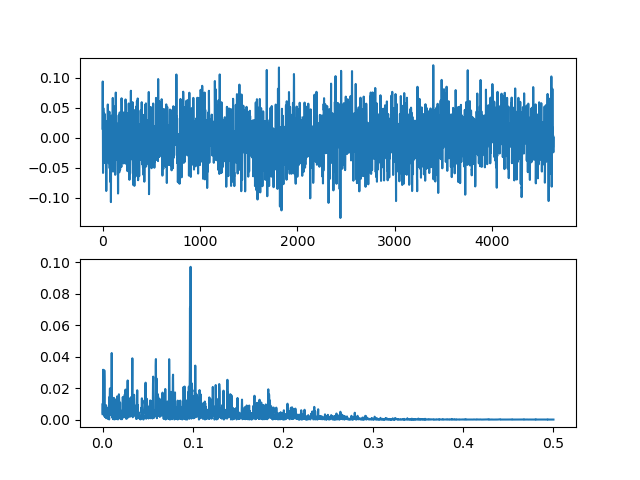

In [23]:
g = still_data['angularVelocity_1'][:, 1]
Fs = 500  # 500 Hz rate
f, Pxx = signal.periodogram(g, window="hann", detrend="linear", scaling='density')
plt.close("all")
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(g - np.mean(g))
plt.subplot(2, 1, 2)
plt.plot(f, Pxx)
print("Std:", np.std(g))

In [11]:
2000 / (0xFFFF >> 1)

0.061037018951994385